In [135]:
# Imports
import pandas as pd
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import csv
from scipy.signal import find_peaks

In [136]:
ball_data = pd.read_csv("/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 1 - Intro to tools/bouncing_ball_raw_data.csv")
ball_data

,Time (s),Position (m)
0,0.40,0.13
1,0.42,0.12
2,0.44,0.12
3,0.46,0.12
4,0.48,0.15
...,...,...
175,3.90,1.29
176,3.92,1.27
177,3.94,1.28
178,3.96,1.29


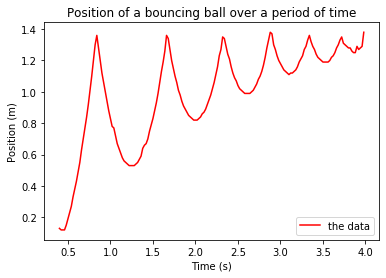

In [137]:
# Declaring global variables
gravity = 9.81 #acceleration of gravity in metres per second squared
ball_mass = 0.0354 #mass of the ball in Kilograms
sensor_height = 1.35 #height of sensor from the ground in metres

# Plotting the graph and visualising the data
x = ball_data["Time (s)"]
y = ball_data["Position (m)"]

# x = ball_data["Time (s) Run #2"]
# y = ball_data["Position (m) Run #2"]

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Position of a bouncing ball over a period of time")    
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)")

ax1.plot(x,y, c='r', label='the data')

leg = ax1.legend()

plt.show()

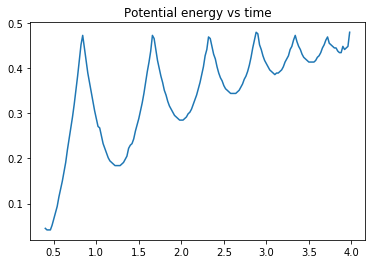

In [138]:
# We have to make an estimate of how much energy the ball loses each time it bounces
# First, we have to calculate the loss in potential energy(PE) every time the ball bounces,
# To do this we can find the difference in potential energy from the peaks of the position of the bounce.
# We can use the eqution V = -GMm/r which calculates the potential energy of an body at a given distance
# from the centre of the planet (Earth, in this case). There is a simpler way of calculating the difference
# in PE using the equation E = mgh

def Potential_Energy_Difference(m,h,g):
    pot_energy = []
    for i in range(len(ball_data)):
        pot_energy.append(m * h[i] * g)
#         print(pot_energy[i])
    return pot_energy

pot_energy = Potential_Energy_Difference(ball_mass,y,gravity)
plt.plot(x, pot_energy)
plt.title("Potential energy vs time")
plt.show()

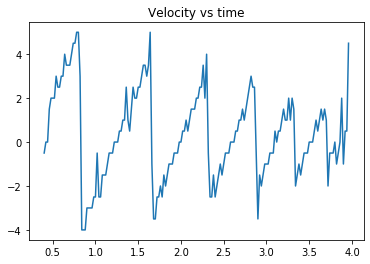

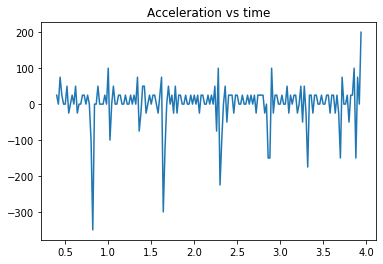

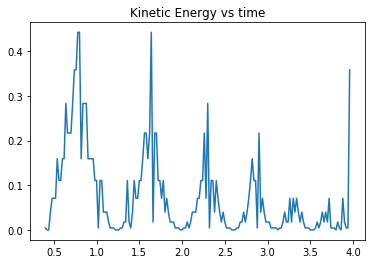

In [139]:
# Second, we have to calculate the kinetic energy of the ball as it bounces.
# We can use the euquation KE = 0.5*m*v^2.
# The bouncing_ball_raw_data.csv doesn't contain the velocity so we have to calculate it.
# To do this we have to calculate the derivtive of the position vs time graph.
# We have to use the equation ƒ´(x) = lim h->0 (ƒ(x + h) + ƒ(x))/h
# The bouncing_ball_data.csv does contain the velocity so we can use that.

# def Kinetic_Energy(m,p):
#     kin_energy = []
#     ball_velocity = []
#     for i in range(len(ball_data)):
#         h = p[i]/10
#         velocity = (p[i]+h) - p[i] / h
# #         print(velocity)
#         k_e = 0.5 * m * velocity**2
#         kin_energy.append(k_e)
#         ball_velocity.append(velocity)
        
#     return kin_energy, ball_velocity
    
    
# kin_energy = Kinetic_Energy(ball_mass,y)[0]
# velocity = Kinetic_Energy(ball_mass,y)[1]

# plt.plot(x,kin_energy)
# plt.show()
# plt.plot(x,velocity)
# plt.show()

velocity = np.diff(ball_data['Position (m)']) / np.diff(ball_data['Time (s)'])
# print(velocity)
plt.plot(x[0:179],velocity)
plt.title("Velocity vs time")
plt.show()

acceleration = np.diff(velocity) / np.diff(ball_data['Time (s)'][0:179])
# print(acceleration)
plt.plot(x[0:178], acceleration)
plt.title("Acceleration vs time")
plt.show()

kinetic_energy = []
for i in range(len(velocity)):
    k_e = 0.5 * ball_mass * velocity[i]**2
    kinetic_energy.append(k_e)
plt.plot(x[0:179],kinetic_energy)
plt.title("Kinetic Energy vs time")
plt.show()

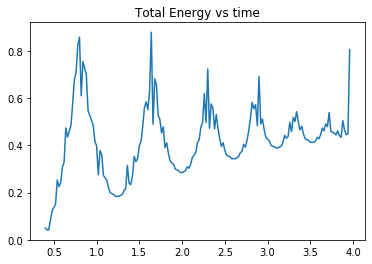

In [123]:
total_energy = []
for i in range(179):
    tot_e = kinetic_energy[i] + pot_energy[i]
    total_energy.append(tot_e)
plt.plot(x[0:179],total_energy)
plt.title("Total Energy vs time")
plt.show()

[]
